**Final Project DS 2003**

Group Members: Lulya Haile (dmm4pq), Nishita Koya (vfj8ba), Simon Tao (whx3pt), and Tyler Qiu (whp3ar)

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "iframe_connected"

In [2]:
df = pd.read_csv("diabetes_dataset.csv", on_bad_lines='skip')

In [3]:
print(df.shape)

(100000, 31)


**Visualization 1**

In [8]:
# Calculate correlations with diabetes_risk_score
medical_vars = ['glucose_fasting', 'hba1c', 'family_history_diabetes',
                'age', 'systolic_bp', 'bmi', 'insulin_level', 'glucose_postprandial']
lifestyle_vars = ['physical_activity_minutes_per_week', 'alcohol_consumption_per_week',
                  'sleep_hours_per_day', 'diet_score', 'screen_time_hours_per_day']

# Clean all columns - strip whitespace if string, convert to numeric
for col in lifestyle_vars + medical_vars + ['diabetes_risk_score']:
    if df[col].dtype == 'object':  # If it's a string column
        df[col] = df[col].astype(str).str.strip()  # Remove whitespace
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric

# Drop rows with NaN in diabetes_risk_score
df = df.dropna(subset=['diabetes_risk_score'])

# Calculate correlations
medical_corr = {var: df[var].corr(df['diabetes_risk_score']) for var in medical_vars}
lifestyle_corr = {var: df[var].corr(df['diabetes_risk_score']) for var in lifestyle_vars}

# Prepare data for plotting
medical_df = pd.DataFrame({
    'Variable': list(medical_corr.keys()),
    'Correlation': list(medical_corr.values()),
    'Category': 'Medical/Physiological'
})

lifestyle_df = pd.DataFrame({
    'Variable': list(lifestyle_corr.keys()),
    'Correlation': list(lifestyle_corr.values()),
    'Category': 'Lifestyle/Socioeconomic'
})

# Combine and sort
combined_df = pd.concat([medical_df, lifestyle_df])
combined_df = combined_df.sort_values('Correlation', ascending=True)

# Create interactive bar chart
fig = go.Figure()

# Add medical/physiological bars
medical_data = combined_df[combined_df['Category'] == 'Medical/Physiological']
fig.add_trace(go.Bar(
    y=medical_data['Variable'],
    x=medical_data['Correlation'],
    name='Medical/Physiological',
    orientation='h',
    marker=dict(color='#3498db'),
    hovertemplate='%{y}Correlation: %{x:.3f}'
))

# Add lifestyle/socioeconomic bars
lifestyle_data = combined_df[combined_df['Category'] == 'Lifestyle/Socioeconomic']
fig.add_trace(go.Bar(
    y=lifestyle_data['Variable'],
    x=lifestyle_data['Correlation'],
    name='Lifestyle/Socioeconomic',
    orientation='h',
    marker=dict(color='#e67e22'),
    hovertemplate='%{y}Correlation: %{x:.3f}'
))

# Update layout
fig.update_layout(
    title='Correlation of Factors with Diabetes Risk Score:Medical vs. Lifestyle Factors',
    xaxis_title='Correlation with Diabetes Risk Score',
    yaxis_title='Variable',
    barmode='group',
    height=600,
    width=1000,
    hovermode='closest',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template='plotly_white'
)

fig.show()


**Visualization 2**

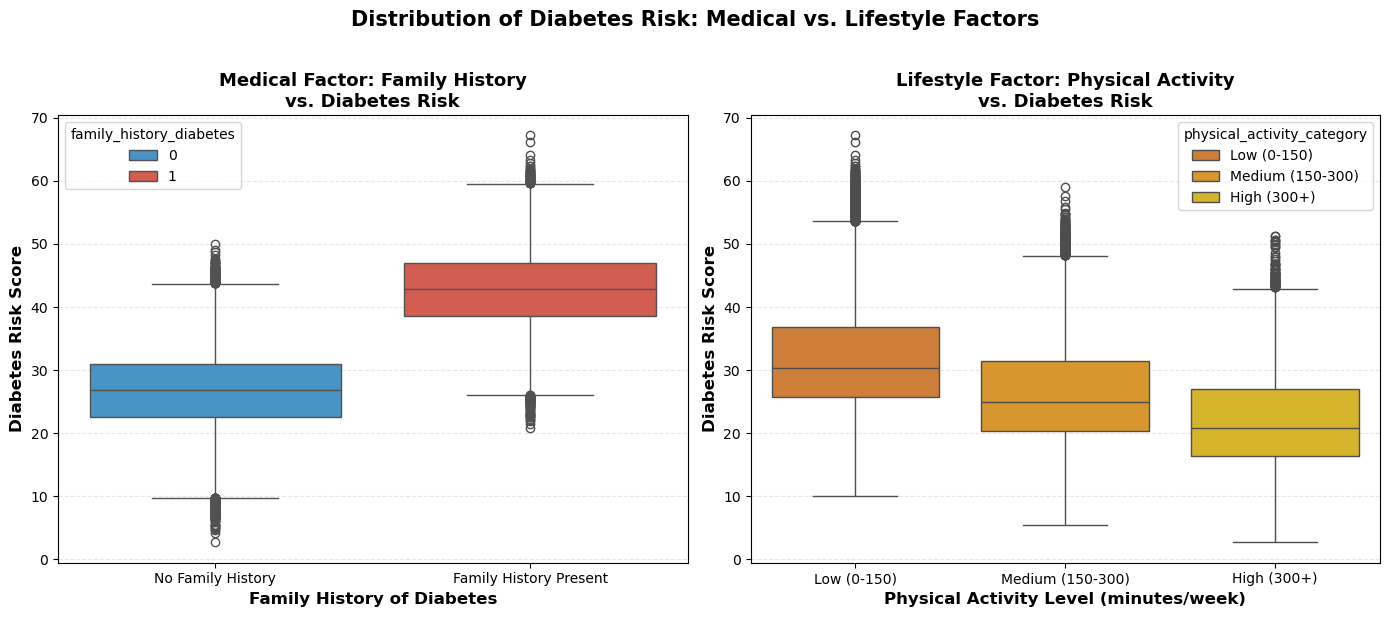

In [5]:
# Create bins for physical activity
df['physical_activity_category'] = pd.cut(
    df['physical_activity_minutes_per_week'],
    bins=[0, 150, 300, 600],
    labels=['Low (0-150)', 'Medium (150-300)', 'High (300+)']
)

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Family History vs Diabetes Risk Score
sns.boxplot(
    data=df,
    x='family_history_diabetes',
    y='diabetes_risk_score',
    hue='family_history_diabetes',
    ax=axes[0],
    palette=['#3498db', '#e74c3c']
)
axes[0].set_xlabel('Family History of Diabetes', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Diabetes Risk Score', fontsize=12, fontweight='bold')
axes[0].set_title('Medical Factor: Family History\nvs. Diabetes Risk', fontsize=13, fontweight='bold')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Family History', 'Family History Present'])
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Plot 2: Physical Activity vs Diabetes Risk Score
sns.boxplot(
    data=df,
    x='physical_activity_category',
    y='diabetes_risk_score',
    hue='physical_activity_category',
    ax=axes[1],
    palette=['#e67e22', '#f39c12', '#f1c40f']
)
axes[1].set_xlabel('Physical Activity Level (minutes/week)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Diabetes Risk Score', fontsize=12, fontweight='bold')
axes[1].set_title('Lifestyle Factor: Physical Activity\nvs. Diabetes Risk', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

# Add overall title
fig.suptitle('Distribution of Diabetes Risk: Medical vs. Lifestyle Factors',
             fontsize=15, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

**Visualization 3**

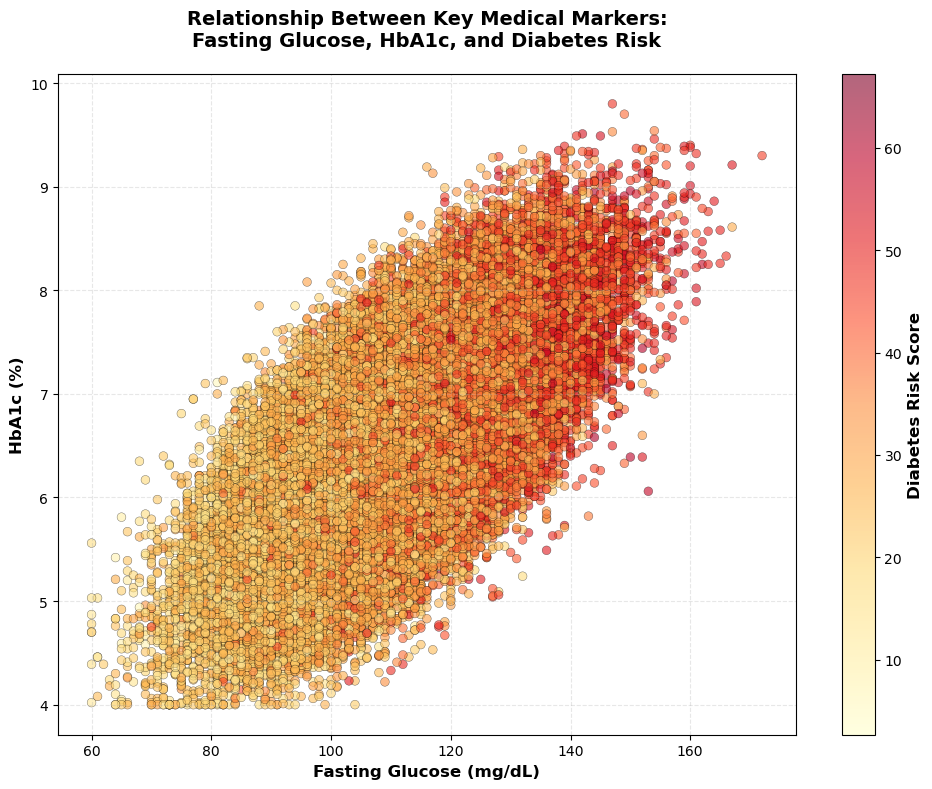

In [6]:
# Clean data
df['glucose_fasting'] = pd.to_numeric(df['glucose_fasting'], errors='coerce')
df['hba1c'] = pd.to_numeric(df['hba1c'], errors='coerce')
df['diabetes_risk_score'] = pd.to_numeric(df['diabetes_risk_score'], errors='coerce')

# Remove NaN values
df_clean = df.dropna(subset=['glucose_fasting', 'hba1c', 'diabetes_risk_score'])

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 8))

# Create scatter plot colored by diabetes risk score
scatter = ax.scatter(df_clean['glucose_fasting'],
                     df_clean['hba1c'],
                     c=df_clean['diabetes_risk_score'],
                     cmap='YlOrRd',
                     alpha=0.6,
                     s=40,
                     edgecolors='black',
                     linewidth=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Diabetes Risk Score', fontsize=12, fontweight='bold')

# Labels and title
ax.set_xlabel('Fasting Glucose (mg/dL)', fontsize=12, fontweight='bold')
ax.set_ylabel('HbA1c (%)', fontsize=12, fontweight='bold')
ax.set_title('Relationship Between Key Medical Markers:\nFasting Glucose, HbA1c, and Diabetes Risk',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

**Big-Picture Question**

What combination of lifestyle, physiological, and medical factors are most strongly associated with an individual’s risk of developing diabetes?

**Sub-Questions**

How do the correlations between medical history and risk of having diabetes compare within the different types of medical history?

Do physiological factors appear to have high correlations with a risk of having diabetes? Why might these relationships exist?

How do social aspects (age, gender, and ethnicity) contribute to risk of diabetes?

At the beginning of our project, when we decided to focus on the topic of diabetes, we developed several broad questions regarding the impact that economic, lifestyle, medical, physiological, and social factors have on diabetes risk. After completing the EDA analysis of our data, we refined our questions into one main big-picture question: What combination of lifestyle, physiological, and medical factors are most strongly associated with an individual’s risk of developing diabetes? We also narrowed down our sub-topic questions to ask how and why certain features correlate with either an increased or decreased risk of diabetes. These questions were finalized after our EDA analysis, which revealed that certain factors (such as family history, systolic blood pressure, and age) have a greater correlation with the risk of getting diabetes. Also, we decided not to focus on economic factors as much as they have a weaker correlation with the risk of diabetes. Overall, our big-picture question and sub-questions now focus on identifying which groups of variables are more important for assessing the risk of gaining diabetes as well as exploring the reasons behind those differences. 

**Narrative**

The story that we are telling through this project begins with the assumption that the risk of developing diabetes is influenced by a combination of medical, physiological, lifestyle, and socioeconomic factors. Using the Diabetes Health Indicators Dataset, which consists of 100,000 realistically-generated patient profiles, we approached this by first analyzing the distribution of variables and identifying their correlation with the diabetes risk score. Through EDA models, including boxplots, histograms, and correlation matrices, we determined that factors such as age, fasting glucose, systolic blood pressure, and family history show a stronger correlation with the risk of having diabetes. This discovery also led us to our main narrative “conflict.” In some cases, there is a stigma surrounding individuals who develop diabetes, where it is believed that they have “done this to themselves.” This is also a more widespread view associated with Type 2 diabetes, which is the form of diabetes that heavily makes up our dataset. But through our EDA analysis of the data, it suggests that past medical history and physiological factors may have a stronger relationship with the risk of developing diabetes as opposed to just lifestyle and economic roles. More specifically, when we analyzed the relationship between lifestyle habits (physical activity, alcohol consumption, and hours of sleep), we found weak correlations with the diabetes risk. We compared these results with medical and physiological factors, where we saw stronger correlations with diabetes risk. Through analysis of our dataset, we concluded that the risk of getting diabetes is primarily driven by physiological markers and family history. Lifestyle and socioeconomic variables, while still relevant, play a much smaller role than commonly assumed. This conclusion challenges the narrative of diabetes being a self-inflicted risk and rather emphasizes the importance of medical screenings and awareness of one's genetic backgrounds.